In [23]:
from pymongo import MongoClient
import time
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
DB_URI = ""
client = MongoClient(DB_URI)
db = client["time_study"]
collection = db["collection1"]

In [ ]:
# generate and insert data 
def generate_random_data(size_in_kb):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=size_in_kb * 1024))

sizes = [1] + [100] + list(range(500, 16 * 1024 + 1, 500))
documents = [{
    "doc_id": i,
    "data": generate_random_data(size_in_kb=size)
} for i, size in enumerate(sizes)]

collection.insert_many(documents)

collection.create_index("doc_id")

'doc_id_1'

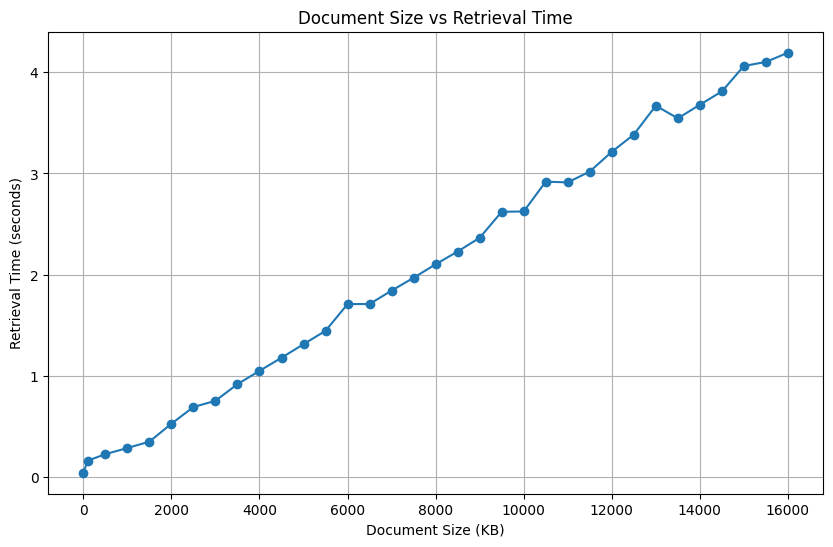

In [19]:
# call the documents in a loop and record time and draw aline graph
retrieval_times = []
for doc in documents:
    start_time = time.time()
    collection.find_one({"doc_id": doc["doc_id"]})
    end_time = time.time()
    retrieval_times.append(end_time - start_time)

plt.figure(figsize=(10, 6))
plt.plot(sizes, retrieval_times, marker='o')
plt.title("Document Size vs Retrieval Time")
plt.xlabel("Document Size (KB)")
plt.ylabel("Retrieval Time (seconds)")
plt.grid(True)
plt.show()

In [21]:
# record the data in a csv to draw other graphs
import pandas as pd

results_df = pd.DataFrame({
    "doc_id": [doc["doc_id"] for doc in documents],
    "doc_size_kb": sizes,
    "retrieval_time_sec": retrieval_times
})

print(results_df)
print(results_df["retrieval_time_sec"].sum())

results_df.to_csv("retrieval_times.csv", index=False)

    doc_id  doc_size_kb  retrieval_time_sec
0        0            1            0.041231
1        1          100            0.160861
2        2          500            0.224829
3        3         1000            0.285610
4        4         1500            0.348392
5        5         2000            0.525782
6        6         2500            0.690862
7        7         3000            0.752193
8        8         3500            0.917135
9        9         4000            1.048192
10      10         4500            1.178026
11      11         5000            1.312266
12      12         5500            1.444034
13      13         6000            1.708558
14      14         6500            1.709344
15      15         7000            1.841906
16      16         7500            1.968725
17      17         8000            2.102050
18      18         8500            2.228474
19      19         9000            2.363965
20      20         9500            2.621201
21      21        10000         